# NGC 0288

## NGC0288 Introduction

1. 위치와 거리: NGC 288은 남쪽 하늘에 위치한 조각가자리(Sculptor constellation) 방향에 있으며, 지구로부터 약 29,200광년 떨어져 있습니다.

2. 발견: 이 성단은 18세기 후반에 윌리엄 허셜에 의해 발견되었습니다.

3. 특징: NGC 288은 상대적으로 느슨한 구조를 가진 구상성단으로 알려져 있습니다. 이는 중심부의 별들이 다른 구상성단에 비해 덜 밀집되어 있다는 것을 의미합니다. 이러한 느슨한 구조는 그것의 진화 상태나 초기 조건에 대한 단서를 제공할 수 있습니다.

4. 별의 구성: 이 성단은 주로 노란색 및 빨간색 거성들로 이루어져 있으며, 이는 별들이 진화의 상당히 늦은 단계에 있음을 나타냅니다. NGC 288 내의 별들은 수십억 년의 나이로 추정됩니다.

5. 연구의 중요성: 천문학자들은 NGC 288과 같은 구상성단을 연구하여 별의 진화, 은하계의 초기 조건, 그리고 우주의 나이 등에 대해 이해를 높입니다. 또한, 구상성단은 다양한 천문학적 현상과 동적 과정을 연구하는데 중요한 대상이기도 합니다.

##  Reference

- https://github.com/laingmic005/aperture-photometry/blob/main/L1_fits-handling.ipynb

- https://youtu.be/_DzSIeruotQ?si=ScAl1J5rSqyIt_ap

- https://archive.stsci.edu/prepds/hugs/

# 1. 데이터 전처리

In [1]:
import os

# 대상 폴더 경로 설정
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc0288'

# 폴더 내의 모든 파일 및 폴더 목록을 가져옴
files = os.listdir(folder_path)
list_files = []

# 모든 파일명 출력
for file in files:
    if file.endswith('.fits'):
        list_files.append(file)
        print(file)

hlsp_hugs_hst_wfc3-uvis_ngc0288_f336w_v1_stack-0350s.fits
hlsp_hugs_hst_wfc3-uvis_ngc0288_f438w_v1_stack-0041s.fits
hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0010s.fits
hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0130s.fits
hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0010s.fits
hlsp_hugs_hst_wfc3-uvis_ngc0288_f275w_v1_stack-0400s.fits
hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0150s.fits


In [2]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [3]:
import pandas as pd

# 열에서 보여주는 문자열의 최대 길이 설정 (예: 100)
pd.set_option('display.max_colwidth', 100)

list_files_df = pd.Series(list_files)

In [5]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0288_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0288_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0288_multi_v1_catalog-meth3.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_f336w_v1_stack-0350s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_multi_v1_rgb.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_f438w_v1_stack-0041s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0130s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_multi_v1_cmd.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc0288_f275w_v1_stack-0400s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0150s.fits']

## 1.1 Fits 파일 불러오기

In [6]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Target filter는 275w, 336w, 435w 
print(list_files_df)

0    hlsp_hugs_hst_wfc3-uvis_ngc0288_f336w_v1_stack-0350s.fits
1    hlsp_hugs_hst_wfc3-uvis_ngc0288_f438w_v1_stack-0041s.fits
2      hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0010s.fits
3      hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0130s.fits
4      hlsp_hugs_hst_acs-wfc_ngc0288_f606w_v1_stack-0010s.fits
5    hlsp_hugs_hst_wfc3-uvis_ngc0288_f275w_v1_stack-0400s.fits
6      hlsp_hugs_hst_acs-wfc_ngc0288_f814w_v1_stack-0150s.fits
dtype: object


In [8]:
# fits 파일 열기 
fits_f275w = fits.open('HUGS/ngc0288/hlsp_hugs_hst_wfc3-uvis_ngc0288_f275w_v1_stack-0400s.fits')
fits_f336w = fits.open('HUGS/ngc0288/hlsp_hugs_hst_wfc3-uvis_ngc0288_f336w_v1_stack-0350s.fits')
fits_f438w = fits.open('HUGS/ngc0288/hlsp_hugs_hst_wfc3-uvis_ngc0288_f438w_v1_stack-0041s.fits')

In [9]:
print(fits_f275w)
print(fits_f336w)
print(fits_f438w)

In [10]:
header_f275w = fits_f275w[0].header
header_f275w[16:25]

TELESCOP= 'HST     '                                                            
INSTRUME= 'WFC3-UVIS'                                                           
FILTER  = 'F275W   '                                                            
EXPTIME =               2001.0 / Total exposure time of stack (sec.)            
RA_TARG =              13.1885 / R.A. of cluster center (deg)                   
DEC_TARG=   -26.58261111111111 / Dec. of cluster center (deg)                   
RADESYS = 'FK5     '                                                            
TARGNAME= 'NGC0288 '                                                            
DATE-OBS= '2012-10-25T21:31:43' / Date at start of first stack exposure         

In [11]:
# FITS 파일 안의 첫 번째 헤더 (Primary Header)에서 적경과 적위 정보 읽기
header_f275w = fits_f275w[0].header
header_f336w = fits_f336w[0].header
header_f438w = fits_f438w[0].header

ra_f275w = header_f275w['RA_TARG']  # 적경 정보
dec_f275w = header_f275w['DEC_TARG']  # 적위 정보

ra_f336w = header_f336w['RA_TARG']  # 적경 정보
dec_f336w = header_f336w['DEC_TARG']  # 적위 정보

ra_f438w = header_f438w['RA_TARG']  # 적경 정보
dec_f438w = header_f438w['DEC_TARG']  # 적위 정보

# 정보 출력
print(f'Right Ascension of fits_f275w (RA): {ra_f275w}')
print(f'Declination of fits_f275w (Dec): {dec_f275w}')

print(f'Right Ascension of fits_f336w (RA): {ra_f336w}')
print(f'Declination of fits_f336w (Dec): {dec_f336w}')

print(f'Right Ascension of fits_f435w (RA): {ra_f438w}')
print(f'Declination of fits_f435w (Dec): {dec_f438w}')

Right Ascension of fits_f275w (RA): 13.1885
Declination of fits_f275w (Dec): -26.58261111111111
Right Ascension of fits_f336w (RA): 13.1885
Declination of fits_f336w (Dec): -26.58261111111111
Right Ascension of fits_f435w (RA): 13.1885
Declination of fits_f435w (Dec): -26.58261111111111


In [13]:
# f275w 필터 이미지 데이터 EDA

image_data_f275w = fits_f275w[0].data
print(image_data_f275w)
print(type(image_data_f275w))
print(image_data_f275w.shape)

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


In [14]:
print('Min_f275w:', np.min(image_data_f275w))
print('Max_f275w:', np.max(image_data_f275w))
print('Mean_f275w:', np.mean(image_data_f275w))
print("Median_f275w:", np.median(image_data_f275w))
print('Stdev_f275w:', np.std(image_data_f275w))

Min_f275w: -36.0
Max_f275w: 64750.0
Mean_f275w: -13.8450775
Median_f275w: -25.0
Stdev_f275w: 210.94273


In [ ]:
# 2D array -> 1D array로 
# 시간이 너무 오래 걸림
# histogram = plt.hist(image_data_f435w.flatten(), bins='auto')

In [15]:
# f336w 필터 이미지 데이터 EDA

image_data_f336w = fits_f336w[0].data
print(image_data_f336w)
print(type(image_data_f336w))
print(image_data_f336w.shape)

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


In [16]:
print('Min_f336w:', np.min(image_data_f336w))
print('Max_f336w:', np.max(image_data_f336w))
print('Mean_f336w:', np.mean(image_data_f336w))
print('Median_f336w:', np.median(image_data_f336w))
print('Stdev_f336w:', np.std(image_data_f336w))

Min_f336w: -34.0
Max_f336w: 64750.0
Mean_f336w: -12.56951
Median_f336w: -25.0
Stdev_f336w: 273.38788


In [17]:
# f435w 필터 이미지 데이터 EDA

image_data_f438w = fits_f438w[0].data
print(image_data_f438w)
print(type(image_data_f438w))
print(image_data_f438w.shape)

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


In [18]:
print('Min_f438w:', np.min(image_data_f438w))
print('Max_f438w:', np.max(image_data_f438w))
print('Mean_f438w:', np.mean(image_data_f438w))
print('Median_f438w:', np.median(image_data_f438w))
print('Stdev_f438w:', np.std(image_data_f438w))

Min_f438w: -32.0
Max_f438w: 64750.0
Mean_f438w: -14.534008
Median_f438w: -25.0
Stdev_f438w: 95.88553


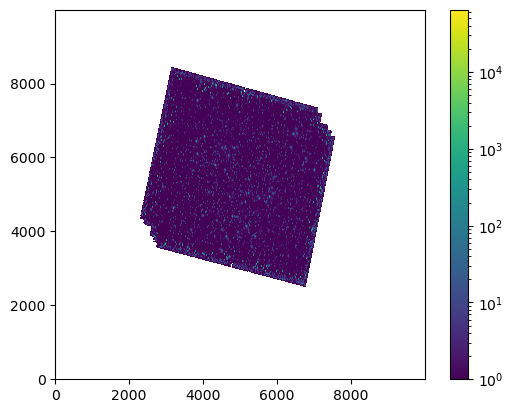

In [19]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [20]:
image_data_center_f275w = image_data_f275w[4000:6000, 4000:6000]

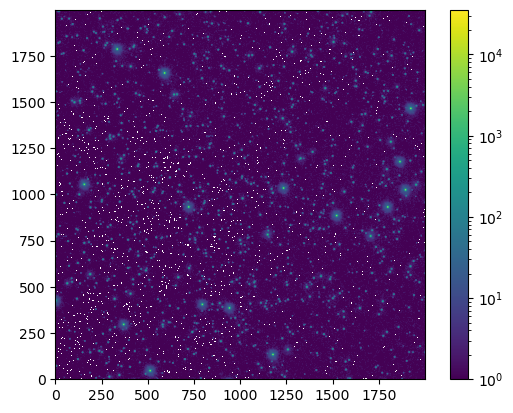

In [21]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

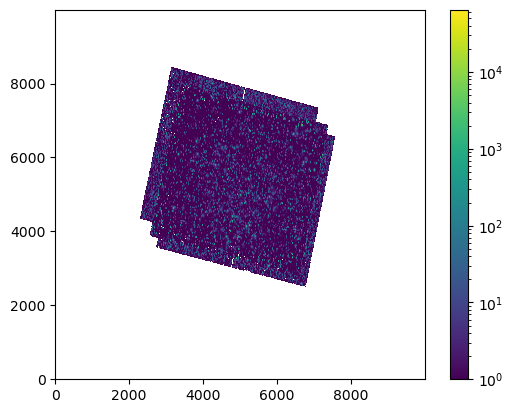

In [22]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [23]:
image_data_center_f336w = image_data_f336w[4000:6000, 4000:6000]

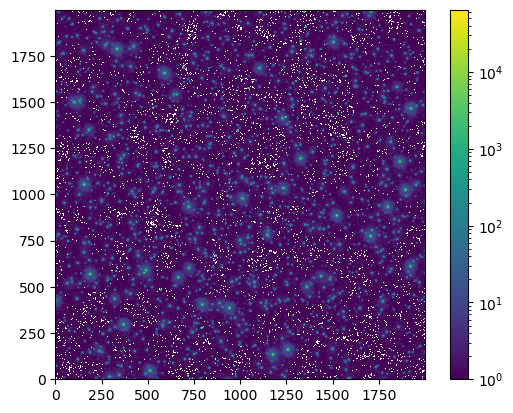

In [24]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

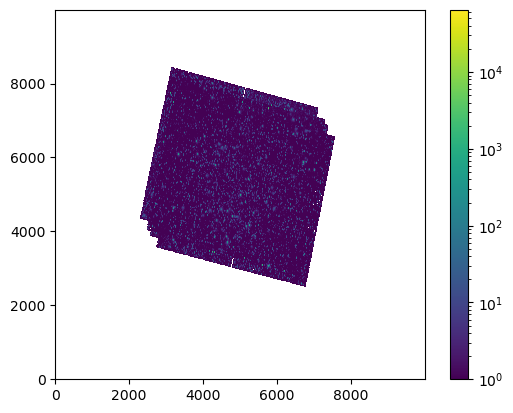

In [25]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [26]:
image_data_center_f438w = image_data_f438w[4000:6000, 4000:6000]

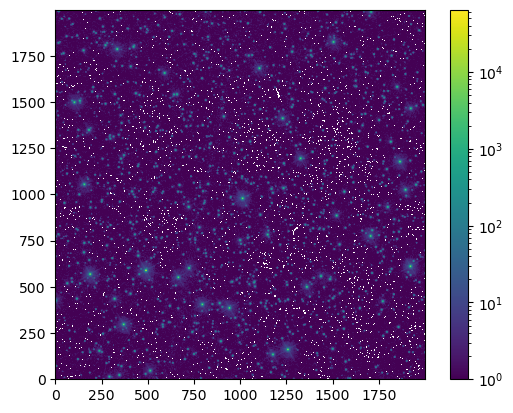

In [28]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

- plt.imshow()에서 origin의 역할
  
> plt.imshow() 함수에서 origin 매개변수는 이미지를 표시할 때 픽셀 좌표 시스템의 원점을 어디에 두는지를 지정하는 역할을 합니다. 이 매개변수는 이미지의 표시 방향을 제어하기 위해 사용됩니다.
>
> origin='upper' (기본값): 좌측 상단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 상단 모서리에서 시작하여 아래쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과는 다릅니다.
>
> origin='lower': 좌측 하단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 하단 모서리에서 시작하여 위쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과 일치합니다.
>
> 대부분의 경우, 이미지 데이터는 origin='upper'로 저장되어 있기 때문에 origin 매개변수를 따로 지정할 필요가 없습니다. 그러나 이미지 데이터가 origin='lower'로 저장되어 있는 경우, 표시 방식을 올바르게 하기 위해 이 매개변수를 설정할 수 있습니다.

## 1.2 그레이 스케일로 나타내기

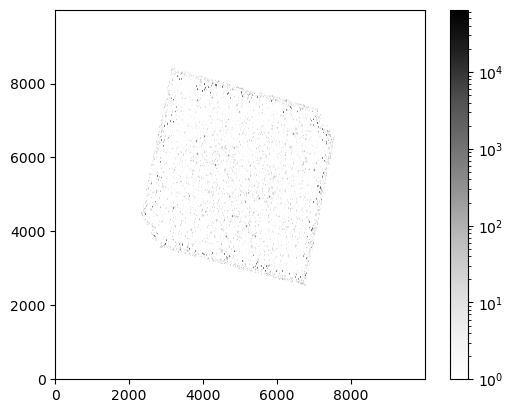

In [29]:
# cmap을 'Greys'로 바꾸고 norm을 LogNorm으로 바꾸기
# 데이터의 범위, order가 넓다 보니 LogNorm으로 정규화함

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Greys 컬러맵의 f275w 이미지 

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

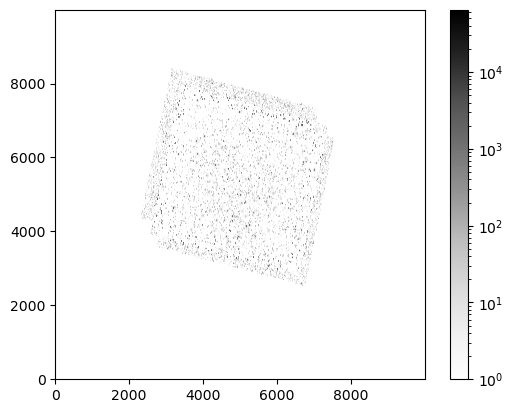

In [30]:
# Greys 컬러맵의 f336w 이미지 
plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

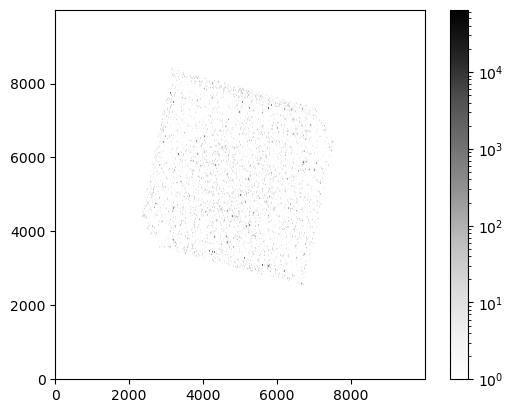

In [31]:
# Greys 컬러맵의 f475w 이미지 
plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

**(참고)**

- 데이터의 작은 부분에 집중하기 위해서는 이미지에서 x와 y의 범위를 선택하여 특정 영역에 포커싱해서 fits 이미지를 살펴봄

- 전체 dimension을 확인하기 위해 info() 함수나 .shape을 사용 

In [33]:
# FITS 데이터를 RGB 이미지로 변환합니다.
# 이 예제에서는 파장1을 빨강(R), 파장2를 녹색(G), 파장3을 파랑(B)으로 사용합니다.
rgb_image = np.dstack((image_data_f275w, image_data_f336w, image_data_f438w))
rgb_image.shape

(10000, 10000, 3)

In [35]:
from PIL import Image

# RGB 이미지를 PIL 이미지로 변환합니다.
pil_image = Image.fromarray((rgb_image * 255).astype(np.uint8))

# 이미지를 저장하거나 표시할 수 있습니다.
pil_image.save('drw/ngc0288_PIL_Image_rgb.jpg')

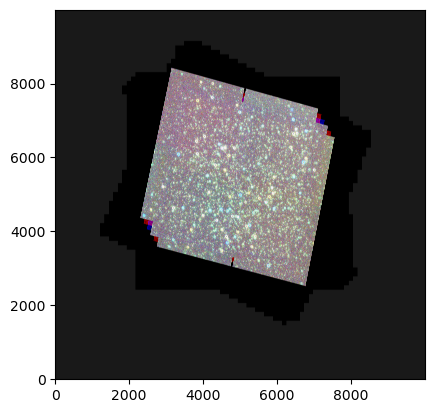

In [36]:
plt.imshow(pil_image, origin = 'lower')
plt.show()

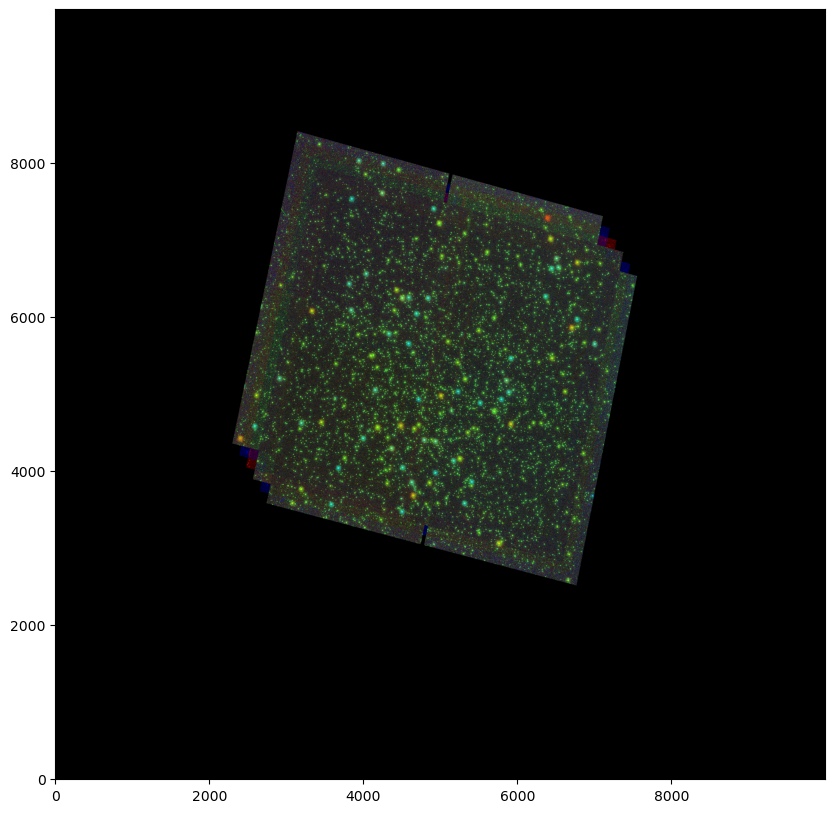

In [38]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

b = image_data_f275w
g = image_data_f336w
r = image_data_f438w

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r, g, b, filename="drw/ngc0288_lupton_rgb.jpeg",)
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절 # 1

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r, g, b, stretch = 10, Q = 10, filename="drw/ngc0104_lupton_rgb_1.jpeg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r*0.7, g*1, b*1, filename="drw/ngc0104_lupton_rgb_2.jpeg", stretch = 100, Q = 1)
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절 # 3

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r*1.5, g*3, b*1.8, stretch = 100, Q = 0.01, filename="drw/ngc0104_lupton_rgb_3.jpeg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절  # 4

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r*1.5, g*3, b*1.8, stretch = 500, Q = 1, filename="drw/ngc0104_lupton_rgb_4.jpeg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절 #5

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r*1.5, g*1.25, b*1.5, stretch = 200, Q = 0.01, filename="drw/ngc0104_lupton_rgb_5.jpeg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
# stretch와 Q값 조절 #6

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (10, 10))
rgb_default = make_lupton_rgb(r*1.0, g*1.6, b*8, stretch = 200, Q = 1, filename="drw/ngc0104_lupton_rgb_6.jpeg")
plt.imshow(rgb_default, origin='lower')

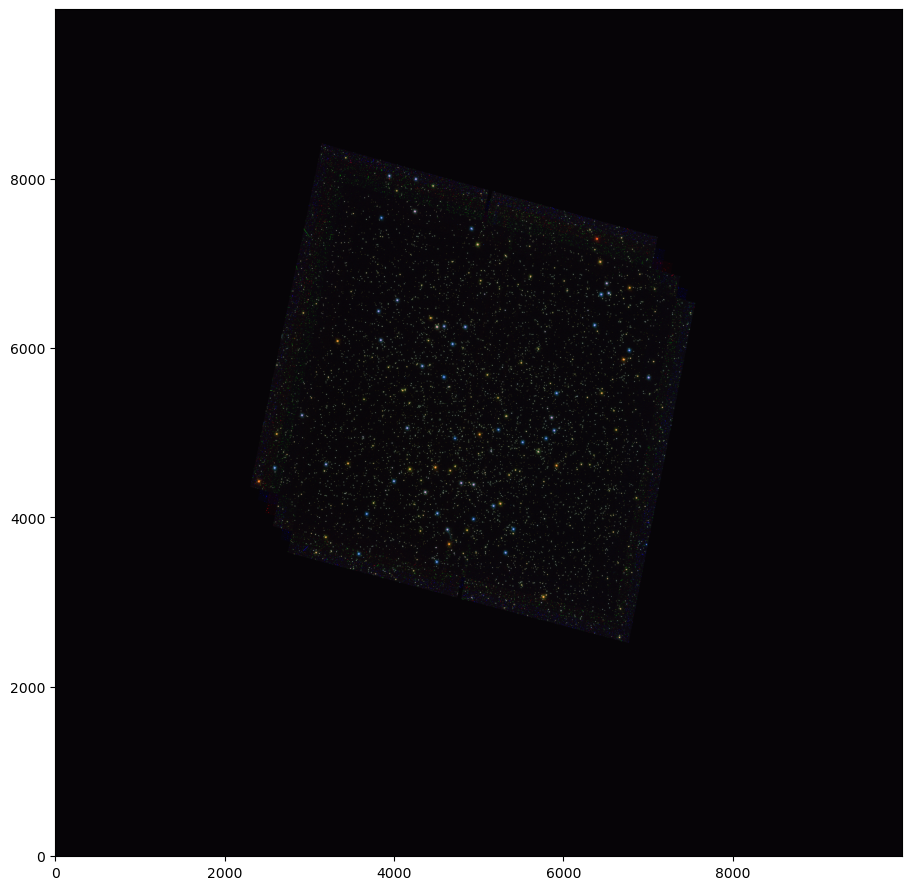

In [77]:
# stretch와 Q값 조절 # 7

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f438w = np.max(image_data_f438w)

imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
imputed_data2_f438w = np.where(image_data_f438w < 1, 1, image_data_f438w)


b = imputed_data2_f275w
g = imputed_data2_f336w
r = imputed_data2_f438w

t_r = 100
r[r > t_r] = t_r

t_g = 100
g[g > t_g] = t_g

t_b = 100
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*1.8, g*1.2, b*2.1, stretch = 75, Q = 0.001, filename="drw/ngc0288_test2.jpg")
plt.figure(figsize= (11,11))
plt.imshow(rgb_default, origin='lower')

----

HUGS 제공 RGB 합성 사진
---

![rgb_image](HUGS/ngc0288/hlsp_hugs_hst_wfc3-uvis_ngc0288_multi_v1_rgb.png)

# 2. Photutils-detection

* Photutils: An Astropy Package for Photometry

> `Photutils`는 파이썬의 과학 이미지 처리 및 천체학 이미지 분석을 위한 패키지입니다. 'photutils'는 다양한 이미 처리 작업에 사용되며, 주로 천문학에서 물체의 위치, 밝기, 크기 및 형태를 추출하고 측정하는 데 사용됩니다. 다음은 photutils의 주요 기능과 몇 가지 예시입니다:
> 
> 1. **Aperture Photometry**: photutils를 사용하여 이미지에서 특정 물체 주위의 원 또는 타원 모양의 영역(아파처)을 정의하고 해당 아파처 내의 픽셀 값을 합산하여 물체의 밝기를 측정할 수 있습니다. 이것은 천체학적 객체의 등급 측정에 유용합니다.
> 
> 2. **PSF Photometry**: Point Spread Function (PSF) 기반의 천체 항목 검출 및 등급 측정을 수행합니다. 이것은 천체학 이미지에서 별과 같은 지점 소스를 분석하는 데 사용됩니다.
>
> 3. **Background Subtraction**: 이미지에서 백그라운드 레벨을 추정하고 이를 천체학적 객체의 밝기 측정에 사용할 수 있습니다.
>
> 4. **Detection and Segmentation**: 물체를 감지하고 분할(segment)하는 도구를 제공합니다. 물체의 위치를 식별하고 관심 물체를 분리하는 데 사용됩니다.
> 
> 5. **Photometry Algorithms**: 여러 가지 다양한 천체학적 등급 측정 알고리즘을 제공하며 사용자는 필요에 따라 선택할 수 있습니다.
> 
> photutils는 간단한 작업부터 복잡한 이미지 분석 작업까지 다양한 천체학적 이미지 처리 작업을 수행할 수 있는 강력한 도구를 제공합니다. 이 패키지는 과학 연구 및 천체학 연구에서 자주 사용되며, 파이썬으로 이미지 처리 및 분석을 수행하려는 연구자 및 과학자에게 유용합니다.

## 2.1 simga clipped stats

In [ ]:
# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
mean_f275w, median_f275w, std_f275w = sigma_clipped_stats(image_data_f275w, sigma = 3.0) # 기본값이 sigma = 3
mean_f336w, median_f336w, std_f336w = sigma_clipped_stats(image_data_f336w, sigma = 3.0)
mean_f435w, median_f435w, std_f435w = sigma_clipped_stats(image_data_f435w, sigma = 3.0)

sigma-clipping 

>    Perform sigma-clipping on the provided data.
>
>   The data will be iterated over, each time rejecting values that are
    less or more than a specified number of standard deviations from a
    center value.
>
>   Clipped (rejected) pixels are those where::
>
>        data < center - (sigma_lower * std)
>        data > center + (sigma_upper * std)
>
>    where::
>
>        center = cenfunc(data [, axis=])
>        std = stdfunc(data [, axis=])
>
>    Invalid data values (i.e., NaN or inf) are automatically clipped.
>
>    For an object-oriented interface to sigma clipping, see
>    :class:`SigmaClip`.
>

sigma_clipped_stats 함수는 주어진 데이터에서 이상치를 제외하고 계산된 평균, 중간값, 표준 편차를 반환합니다. 이를 사용하여 데이터의 중심 경향성과 분포를 이상치에 영향받지 않고 더 정확하게 평가할 수 있습니다.

$$\frac{{\sigma}_{old} - {\sigma}_{new}}{{\sigma}_{new}}$$

In [ ]:
# print data
print(f'mean of image_data_f275w: {mean_f275w}')
print(f'median of image_data_f275w: {median_f275w}')
print(f'standard deviation of image_data_f275w: {std_f275w}')
print("\n")

# print data
print(f'mean of image_data_f336w: {mean_f336w}')
print(f'median of image_data_f336w: {median_f336w}')
print(f'standard deviation of image_data_f336w: {std_f336w}')
print("\n")

# print data
print(f'mean of image_data_f435w: {mean_f435w}')
print(f'median of image_data_f435w: {median_f435w}')
print(f'standard deviation of image_data_f435w: {std_f435w}')

In [ ]:
# 원본 데이터와 비교 

print('Min_f275w:', np.min(image_data_f275w))
print('Max_f275w:', np.max(image_data_f275w))
print('Mean_f275w:', np.mean(image_data_f275w))
print("Median_f275w:", np.median(image_data_f275w))
print('Stdev_f275w:', np.std(image_data_f275w))
print('-'*50)

print('Min_f336w:', np.min(image_data_f336w))
print('Max_f336w:', np.max(image_data_f336w))
print('Mean_f336w:', np.mean(image_data_f336w))
print('Median_f336w:', np.median(image_data_f336w))
print('Stdev_f336w:', np.std(image_data_f336w))
print('-'*50)

print('Min_f435w:', np.min(image_data_f435w))
print('Max_f435w:', np.max(image_data_f435w))
print('Mean_f435w:', np.mean(image_data_f435w))
print('Median_f435w:', np.median(image_data_f435w))
print('Stdev_f435w:', np.std(image_data_f435w))

## 2.2 DAOStarFinder

In [ ]:
'''Use DAOStarFinder to detect stars'''

from photutils.detection import DAOStarFinder

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
daofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f275w)
daofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f336w)
daofind_f435w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f435w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
sources_f275w = daofind_f275w(image_data_f275w - median_f275w)
sources_f336w = daofind_f336w(image_data_f336w - median_f336w)
sources_f435w = daofind_f435w(image_data_f275w - median_f435w)

In [ ]:
print(f'sources_f275w의 길이는 {len(sources_f275w)}')
print(f'sources_f336w의 길이는 {len(sources_f336w)}')
print(f'sources_f435w의 길이는 {len(sources_f435w)}')

In [ ]:
# format sources table 
for col in sources_f275w.colnames:
    if col not in ('id', 'npix'):
        sources_f275w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f275w.pprint(max_width = 76)

#-----------------------------------------------------------#
for col in sources_f336w.colnames:
    if col not in ('id', 'npix'):
        sources_f336w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f336w.pprint(max_width = 76)

#-----------------------------------------------------------#
for col in sources_f435w.colnames:
    if col not in ('id', 'npix'):
        sources_f435w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f435w.pprint(max_width = 76)

'''
# 그림이 급하다면 round 함수 이용 처리 가능 

sources_f275w.round(2)
pd_src_f275w = sources_f275w.to_pandas()
print(pd_src_f275w.head())

sources_f336w.round(2)
pd_src_f336w = sources_f336w.to_pandas()
print(pd_src_f336w.head())

sources_f435w.round(2)
pd_src_f435w = sources_f435w.to_pandas()
print(pd_src_f435w.head())
'''

### CircularAperture

#### f275w visualization

In [ ]:
# matplotlib를 이용한 구상성단 시각화

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f275w = np.transpose((sources_f275w['xcentroid'], sources_f275w['ycentroid']))
apertures_f275w = CircularAperture(positions_f275w, r = 5.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f275w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f336w visualization

In [ ]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f336w = np.transpose((sources_f336w['xcentroid'], sources_f336w['ycentroid']))
apertures_f336w = CircularAperture(positions_f336w, r = 5.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f336w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f435w visualization

In [ ]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f435w = np.transpose((sources_f435w['xcentroid'], sources_f435w['ycentroid']))
apertures_f435w = CircularAperture(positions_f435w, r = 5.0)
plt.imshow(image_data_f435w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f435w.plot(color = 'blue', lw = 0.1, alpha = 0.1);


> Supported values for interpolation are 
> 'bicubic', 'antialiased', 'spline36', 'bilinear', 'gaussian', 
> 'lanczos', 'blackman', 'nearest', 'kaiser', 'quadric', 'mitchell', 
> 'catrom', 'hanning', 'none', 'spline16', 
> 'bessel', 'hermite', 'hamming', 'sinc'


### Find peaks

- 피크 픽셀을 찾는 방법

    + 피크는 로컬 영역 내에서 임계값을 초과하는 최대값

        * 로컬 영역 내의 여러 픽셀이 동일한 강도를 갖는 경우 해당 픽셀의 좌표를 모두 반환
        * 그렇지 않을 경우, 로컬 영역당 피크 픽셀이 하나만 있음
        * 따라서 정의된 영역은 영역 내에 동일한 피크가 없는 한 피크 간 최소 간격을 효과적으로 부과할 수 있음
        * 또한 픽셀이므로 결과는 정수 좌표로 나오게 됨

#### f275w visualization

In [ ]:
# 사용하는 함수 import 

from photutils.detection import find_peaks

# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f275w = median_f275w + (5.0 * std_f275w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f275w = find_peaks(image_data_f275w - median_f275w, threshold_f275w, box_size = 11)
peaks_f275w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f275w = np.transpose((peaks_f275w['x_peak'], peaks_f275w['y_peak']))
peak_apertures_f275w = CircularAperture(peak_positions_f275w, r = 3.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f275w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f336w visualization

In [ ]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f336w = median_f336w + (5.0 * std_f336w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f336w = find_peaks(image_data_f336w - median_f336w, threshold_f336w, box_size = 11)
peaks_f336w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f336w = np.transpose((peaks_f336w['x_peak'], peaks_f336w['y_peak']))
peak_apertures_f336w = CircularAperture(peak_positions_f336w, r = 3.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f336w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f435w visualization

In [ ]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f435w = median_f435w + (5.0 * std_f435w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f435w = find_peaks(image_data_f435w - median_f435w, threshold_f435w, box_size = 11)
peaks_f435w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f435w = np.transpose((peaks_f435w['x_peak'], peaks_f435w['y_peak']))
peak_apertures_f435w = CircularAperture(peak_positions_f435w, r = 3.0)
plt.imshow(image_data_f435w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f435w.plot(color = 'red', lw = 0.3, alpha = 0.1);

밝은 별들에 대한 마스킹 실시 후 시각화

## 2.3 Background

1. 백그라운드를 제거하세요. photutils를 사용하여 백그라운드를 추정하고 제거할 수 있습니다. 예를 들어, MedianBackground 추정을 사용할 수 있습니다:

In [ ]:
from photutils.background import Background2D
from photutils.background import MedianBackground

bkg_estimator = MedianBackground()
bkg_f275w = Background2D(image_data_f275w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f275w = image_data_f275w - bkg_f275w.background

bkg_f336w = Background2D(image_data_f336w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f336w = image_data_f275w - bkg_f336w.background

bkg_f435w = Background2D(image_data_f435w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f435w = image_data_f435w - bkg_f435w.background

위 코드에서 (50, 50)은 백그라운드를 추정하는 데 사용되는 격자 크기입니다. filter_size는 백그라운드를 평활화하기 위한 필터 크기입니다.

이미지를 그리세요. plt.imshow()를 사용하여 이미지를 그릴 수 있습니다:

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

b = new_f275w
g = new_f336w
r = new_f435w

rgb_default = make_lupton_rgb(r, g, b, filename="drw/ngc0104_lupton_rgb2.jpeg", stretch = 20, Q = 0.01)
plt.imshow(rgb_default, origin='lower')

In [ ]:
extracted_median_f275w = image_data_f275w - median_f275w
extracted_median_f336w = image_data_f336w - median_f336w
extracted_median_f435w = image_data_f275w - median_f435w

b = extracted_median_f275w
g = extracted_median_f336w
r = extracted_median_f435w

rgb_default = make_lupton_rgb(r, g, b, filename="drw/ngc0104_test1.jpg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
print(np.quantile(image_data_f275w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f336w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f435w,np.arange(0.0, 1.1, 0.1)))

print(np.quantile(image_data_f275w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f336w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f435w,np.arange(0.90, 1.01, 0.01)))

In [ ]:
print(np.__version__)

In [ ]:
plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Blues', norm = LogNorm())
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greens', norm = LogNorm(), alpha = 0.8)
plt.imshow(image_data_f435w, origin = 'lower', cmap = 'Reds', norm = LogNorm(), alpha = 0.4)
plt.colorbar()
plt.show()

In [ ]:
# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f435w = np.max(image_data_f435w)

imputed_data_f275w = np.where(image_data_f275w < 0, 0, image_data_f275w/max_f275w)
imputed_data_f336w = np.where(image_data_f336w < 0, 0, image_data_f336w/max_f336w)
imputed_data_f435w = np.where(image_data_f435w < 0, 0, image_data_f435w/max_f435w)

print(np.quantile(imputed_data_f275w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(imputed_data_f336w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(imputed_data_f435w,np.arange(0.0, 1.1, 0.1)))

In [ ]:
from PIL import Image

rgb_image2 = np.dstack((imputed_data_f275w*1255, imputed_data_f336w*255, imputed_data_f435w*255))

# RGB 이미지를 PIL 이미지로 변환합니다.
pil_image2 = Image.fromarray((rgb_image2 * 255).astype(np.uint8))
plt.imshow(pil_image2, origin = 'lower')
plt.show()

In [ ]:
# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f435w = np.max(image_data_f435w)

imputed_data2_f275w = np.where(image_data_f275w < 0, 0, image_data_f275w)
imputed_data2_f336w = np.where(image_data_f336w < 0, 0, image_data_f336w)
imputed_data2_f435w = np.where(image_data_f435w < 0, 0, image_data_f435w)

print(np.quantile(imputed_data2_f275w,np.arange(0.9, 1.0, 0.01)))
print(np.quantile(imputed_data2_f336w,np.arange(0.9, 1.0, 0.01)))
print(np.quantile(imputed_data2_f435w,np.arange(0.9, 1.0, 0.01)))

print(np.quantile(imputed_data2_f275w,np.arange(0.99, 1.001, 0.001)).round())
print(np.quantile(imputed_data2_f336w,np.arange(0.99, 1.001, 0.001)))
print(np.quantile(imputed_data2_f435w,np.arange(0.99, 1.001, 0.001)))

In [ ]:
b = imputed_data2_f275w
g = imputed_data2_f336w
r = imputed_data2_f435w

t = 100
r[r > t] = t
g[g > t] = t
b[b > t] = t

rgb_default = make_lupton_rgb(r*0.9, g, b, stretch = 80, Q = 0.01, filename="drw/ngc0104_test2.jpg")
plt.figure(figsize= (11,11))
plt.imshow(rgb_default, origin='lower')

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Blues', norm = LogNorm())

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greens', norm = LogNorm())

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_data_f435w, origin = 'lower', cmap = 'Oranges', norm = LogNorm())

# 3. 광도 측정

In [ ]:
# variable "section1" contains our image data
# variable "positions" contains our positions 
# variable "apertures" contains our aperture data

'''find background values by drawing an anulus around each star'''

# import tools 
from photutils.aperture import CircularAnnulus
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry



# define annuluses
annulus_aperture_f275w = CircularAnnulus(positions_f275w, r_in = 10, r_out = 15)
annulus_aperture_f336w = CircularAnnulus(positions_f336w, r_in = 10, r_out = 15)
annulus_aperture_f435w = CircularAnnulus(positions_f435w, r_in = 10, r_out = 15)

'''
# plot annuluses
plt.figure()
plt.imshow(image_data_f275w, cmap = 'Greys', norm = LogNorm(), origin = 'lower')
apertures_f275w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
annulus_aperture_f275w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()
'''

### define annuluses of partial region for visualization

In [ ]:
# define annuluses of partial region

# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
pmean_f275w, pmedian_f275w, pstd_f275w = sigma_clipped_stats(image_data_f275w[4500:4600, 4500:4600], sigma = 3.0) # 기본값이 sigma = 3
pmean_f336w, pmedian_f336w, pstd_f336w = sigma_clipped_stats(image_data_f336w[4500:4600, 4500:4600], sigma = 3.0)
pmean_f435w, pmedian_f435w, pstd_f435w = sigma_clipped_stats(image_data_f435w[4500:4600, 4500:4600], sigma = 3.0)

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
pdaofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f275w)
pdaofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f336w)
pdaofind_f435w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f435w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
psources_f275w = daofind_f275w(image_data_f275w[4500:4600, 4500:4600] - pmedian_f275w)
psources_f336w = daofind_f336w(image_data_f336w[4500:4600, 4500:4600] - pmedian_f336w)
psources_f435w = daofind_f435w(image_data_f275w[4500:4600, 4500:4600] - pmedian_f435w)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f275w = np.transpose((psources_f275w['xcentroid'], psources_f275w['ycentroid']))
papertures_f275w = CircularAperture(ppositions_f275w, r = 5.0)
pannulus_aperture_f275w = CircularAnnulus(ppositions_f275w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f336w = np.transpose((psources_f336w['xcentroid'], psources_f336w['ycentroid']))
papertures_f336w = CircularAperture(ppositions_f336w, r = 5.0)
pannulus_aperture_f336w = CircularAnnulus(ppositions_f336w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f435w = np.transpose((psources_f435w['xcentroid'], psources_f435w['ycentroid']))
papertures_f435w = CircularAperture(ppositions_f435w, r = 5.0)
pannulus_aperture_f435w = CircularAnnulus(ppositions_f435w, r_in = 10, r_out = 15)

In [ ]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f275w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f275w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f275w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

In [ ]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f336w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f336w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f336w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

In [ ]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f435w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f435w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f435w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

### define background and perform aperture photometry

In [ ]:
# define background_f275w
aperstats_f275w = ApertureStats(image_data_f275w, annulus_aperture_f275w)
bkg_mean_f275w = aperstats_f275w.mean
aperture_area_f275w = apertures_f275w.area_overlap(image_data_f275w)
total_bkg_f275w = bkg_mean_f275w * aperture_area_f275w

# define background_336w
aperstats_f336w = ApertureStats(image_data_f336w, annulus_aperture_f336w)
bkg_mean_f336w = aperstats_f336w.mean
aperture_area_f336w = apertures_f336w.area_overlap(image_data_f336w)
total_bkg_f336w = bkg_mean_f336w * aperture_area_f336w

# define background_435w
aperstats_f435w = ApertureStats(image_data_f435w, annulus_aperture_f435w)
bkg_mean_f435w = aperstats_f435w.mean
aperture_area_f435w = apertures_f435w.area_overlap(image_data_f435w)
total_bkg_f435w = bkg_mean_f435w * aperture_area_f435w

# perform aperture photometry
star_data_f275w = aperture_photometry(image_data_f275w, apertures_f275w)
star_data_f336w = aperture_photometry(image_data_f336w, apertures_f336w)
star_data_f435w = aperture_photometry(image_data_f435w, apertures_f435w)


# add backgrounds to table
star_data_f275w['total_bkg'] = total_bkg_f275w
star_data_f336w['total_bkg'] = total_bkg_f336w
star_data_f435w['total_bkg'] = total_bkg_f435w



In [ ]:
aperstats_f275w

In [ ]:
# format and print data
for col in star_data_f275w.colnames:
    star_data_f275w[col].info.format = '%.8g'

star_data_f275w.pprint()

In [ ]:
# format and print data
for col in star_data_f336w.colnames:
    star_data_f336w[col].info.format = '%.8g'

star_data_f336w.pprint()

In [ ]:
# format and print data
for col in star_data_f435w.colnames:
    star_data_f435w[col].info.format = '%.8g'

star_data_f435w.pprint()

In [ ]:
'''
find zeropoint from catalogue based on filter and instrument.
Install acs tools by typing the following command into the terminal:

$pip install acstools

ACStools: Python tools for Hubble Space Telescope Advanced Camera for Surveys data

The ACStools package contains Python tools to work with data 
from the Hubble Space Telescope (HST) Advanced Camera for Surveys (ACS). 
The package has several calibration utilities and a zeropoints calculator, 
can detect satellite trails, and offers destriping, polarization, and photometric tools.
'''
from acstools import acszpt

In [ ]:
# header_f275w 정보 확인
print("==================f275w=================")
print(f"DATE in header: {header_f275w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f275w['INSTRUME']}")
print(f"FILTER in header: {header_f275w['FILTER']}")
print("-"*40)

# header_f336w 정보 확인
print("==================f336w=================")
print(f"DATE in header: {header_f336w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f336w['INSTRUME']}")
print(f"FILTER in header: {header_f336w['FILTER']}")
print("-"*50)

# header_f435w 정보 확인
print("==================f435w=================")
print(f"DATE in header: {header_f435w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f435w['INSTRUME']}")
print(f"FILTER in header: {header_f435w['FILTER']}")
print("-"*50)

In [ ]:
# find date in header 
date_f275w = '2010-11-21' # 형식 '2006-03-10'
instrument_f275w = 'WFC'  # 'WFC'
filter_f275w = 'F275W'    # 'F814W'

# find date in header 
date_f336w = '2010-09-29' # 형식 '2006-03-10'
instrument_f336w = 'WFC'  # 'WFC'
filter_f336w = 'F336W'    # 'F814W'

# find date in header 
date_f435w = '2002-07-07' # 형식 '2006-03-10'
instrument_f435w = 'WFC'  # 'WFC'
filter_f435w = 'F435W'    # 'F814W'

In [ ]:
# fetch zeropoint from catalogue
q_f435w = acszpt.Query(date = date_f435w, detector = instrument_f435w)
zpt_table_f435w = q_f435w.fetch()

q_filter_f435w = acszpt.Query(date = date_f435w, detector = instrument_f435w, filt = filter_f435w)
filter_zpt_f435w = q_filter_f435w.fetch()

# print data
print(filter_zpt_f435w)

In [ ]:
# fetch zeropoint from catalogue
q_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w)
zpt_table_f336w = q_f336w.fetch()

q_filter_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w, filt = filter_f336w)
filter_zpt_f336w = q_filter_f336w.fetch()

# print data
print(filter_zpt_f336w)

In [ ]:
filter_zpt_f435w.colnames

In [ ]:
type(filter_zpt_f435w['ABmag'])

In [ ]:
# use ABmag from filter_zpt
zeropoint = filter_zpt_f435w['ABmag'].value[0]

# find exposure time in header
extime_f275w = header_f275w['EXPTIME']
extime_f336w = header_f336w['EXPTIME']

print(zeropoint)
print(extime_f275w)
print(extime_f336w)

In [ ]:
type(star_data_f275w_df)

In [ ]:
star_data_f275w_df = star_data_f275w.to_pandas()
star_data_f336w_df = star_data_f336w.to_pandas()

In [ ]:
star_data_f275w_df.head()

In [ ]:
star_data_f336w_df.head()

In [ ]:
star_data_f275w_df['diff_f275w'] = star_data_f275w_df['aperture_sum'] - star_data_f275w_df['total_bkg']
star_data_f275w_df['mag_f275w'] = zeropoint - (2.5*np.log10(abs(star_data_f275w_df['diff_f275w'])/extime_f275w))
star_data_f275w_df.head()

In [ ]:
star_data_f336w_df['diff_f336w'] = star_data_f336w_df['aperture_sum'] - star_data_f336w_df['total_bkg']
star_data_f336w_df['mag_f336w'] = zeropoint - (2.5*np.log10(abs(star_data_f336w_df['diff_f336w'])/extime_f336w))
star_data_f336w_df.head()



MAGNITUDE = ZEROPOINT - 2.5*log_10{(APERTURE_SUM - TOTAL_BKG)/EXTIME}



- f275w 사진과 f336w 사진에 찍힌 별들의 강도에 따라 식별되지 않을 수도 있으며, star find 알고리즘(daofind)에 따라 정확한 위치 값은 상이할 수 있으므로
- float 형태의 값은 버림하고 정수로 일치
- 그 후 inner join 실시

In [ ]:
star_data_f275w_df['xcenter'] = np.floor(star_data_f275w_df['xcenter']).astype(int);
star_data_f275w_df['ycenter'] = np.floor(star_data_f275w_df['ycenter']).astype(int);

star_data_f336w_df['xcenter'] = np.floor(star_data_f336w_df['xcenter']).astype(int);
star_data_f336w_df['ycenter'] = np.floor(star_data_f336w_df['ycenter']).astype(int);

In [ ]:
star_data_f275w_df.head()

In [ ]:
star_data_f336w_df.head()

In [ ]:
ngc0104_merge_df = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

In [ ]:
ngc0104_merge_df.head()

In [ ]:
print(ngc0104_merge_df.shape)
print(ngc0104_merge_df.columns)

In [ ]:
ngc0104_merge_df['diff_mag'] = ngc0104_merge_df['mag_f275w'] - ngc0104_merge_df['mag_f336w']

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(x = ngc0104_merge_df['diff_mag'],
            y = ngc0104_merge_df['mag_f275w'],
            s = 0.1,
            c = 'black')
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0104")
plt.gca().invert_yaxis()
plt.show()

### NGC0104 CMD

* HST UV Globular Cluster Survey ngc0104 연구 결과

![CMD](HUGS/ngc0104/hlsp_hugs_hst_wfc3-uvis_ngc0104_multi_v1_cmd.png)